<a href="https://colab.research.google.com/github/covillarreal/AprendizajeAutomatico/blob/main/VILLARREAL_TP3_AA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 AA1 Aprendizaje no supervisado

**CONSTANZA VILLARREAL**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo


#**Tarea: Entrenamiento y evaluación de clasificadores**  
**Objetivo**: Aplicar un modelo de clasificación a un dataset de su elección, procesar dicho dataset para poder usarlo para entrenamiento, indicar y compartir todos los recursos utilizados, evaluar su rendimiento.




## **Instrucciones**:

#1. **Selección del Dataset**  🪄
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets?Task=Clustering&skip=130&take=10&sort=desc&orderBy=Relevance&search=
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas.  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  

DATASET UTILIZADO: [WINE](https://archive.ics.uci.edu/dataset/109/wine)

* Descripción: Diferencia tipos de vino a partir de características químicas.

* Variables: 13 variables numéricas que describen componentes químicos del vino

* Instancias: 178

* Clases: 3 tipos de vino (multiclase)

* Valores nulos: No tiene

## Resolución:

Importo librerias y configuraciones generales:

In [ ]:
import numpy as np               # arreglos, matemáticas
import pandas as pd              # tablas, datos

import matplotlib.pyplot as plt  # graficos simples
import seaborn as sns            # graficos estadisticos

from sklearn.pipeline import Pipeline                  # encadenar pasos
from sklearn.compose import ColumnTransformer          # transformar columnas
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # escalar, codificar

from sklearn.model_selection import train_test_split, cross_val_score  # dividir datos, validación cruzada
from sklearn.linear_model import LogisticRegression     # clasificación
from sklearn.neighbors import KNeighborsClassifier       # clasificación
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score # métricas, evaluación

In [ ]:
# Nombres de las columnas (según documentación de UCI)
columnas = [
    'Clase','Alcohol','Ácido Málico','Ceniza','Alcalinidad de la Ceniza',
    'Magnesio','Fenoles Totales','Flavonoides','Fenoles No Flavonoides',
    'Proantocianinas','Intensidad de Color','Matiz',
    'OD280/OD315 del Vino','Prolina'
]
# Cargar el dataset
df = pd.read_csv('wine.data.csv', header=None, names=columnas)

# Vista previa
df.head()

,Clase,Alcohol,Ácido Málico,Ceniza,Alcalinidad de la Ceniza,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Intensidad de Color,Matiz,OD280/OD315 del Vino,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735




Primero importo las librerías necesarias: pandas (como pd), que utilizo para manipular y analizar datos; matplotlib.pyplot (como plt), que me sirve para crear gráficos; y seaborn (como sns), que es una librería que mejora la visualización de los datos, haciéndola más estética y sencilla de usar.

Luego, defino una lista de nombres de columnas, que corresponden a las características de un conjunto de datos relacionado con vinos que he sacado la informacion de la página proporcionada. Estos nombres los asigno a la variable columnas.

Después, cargo el conjunto de datos llamado 'wine.data.csv' que seleccione para trabajar utilizando pandas con el método read_csv(). Este método lee el archivo CSV y lo convierte en un DataFrame (una estructura de datos tabular) al que le asigno los nombres de las columnas definidos previamente. Finalmente, imprimo las primeras filas del DataFrame con df.head() para ver cómo luce el conjunto de datos cargado.


In [ ]:
df.head()

,Clase,Alcohol,Ácido Málico,Ceniza,Alcalinidad de la Ceniza,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Intensidad de Color,Matiz,OD280/OD315 del Vino,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



## 2. **Análisis exploratorio (previo al modelado)**   🔎📊
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - Describan si observan o no relaciones entre algunas variables.  


## Resolución:

Con esta línea de código, lo que hago es generar una descripción estadística del DataFrame df usando el método describe(). Este método me proporciona información clave sobre cada una de las columnas numéricas del conjunto de datos, como:

* Cuenta (count): El número de valores no nulos que tiene cada columna.

* Media (mean): El valor promedio de cada columna.

* Desviación estándar (std): Cuánto varían los valores de cada columna respecto a la media.

* Mínimo (min): El valor más bajo de cada columna.

* Cuartiles (25%, 50%, 75%): Los valores que dividen los datos en cuartiles. El 50% es la mediana, y los otros dos valores son el primer y tercer cuartil.

* Máximo (max): El valor más alto de cada columna.

Esto me ayuda a obtener una visión general rápida de cómo están distribuidos los datos y si existen valores atípicos o alguna columna que tenga datos extraños o faltantes.

In [ ]:
df.describe() #descripcion estadistica

,Clase,Alcohol,Ácido Málico,Ceniza,Alcalinidad de la Ceniza,Magnesio,Fenoles Totales,Flavonoides,Fenoles No Flavonoides,Proantocianinas,Intensidad de Color,Matiz,OD280/OD315 del Vino,Prolina
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


📌 Conclusiones clave

Hay varias variables con valores atípicos o asimetrías, como:

* Ácido Málico, Alcalinidad de la Ceniza, Magnesio, Color, y sobre todo Prolina.

Esto sugiere que:

* Hay vinos químicamente muy distintos entre sí.

* Algunas clases pueden tener características químicas mucho más marcadas que otras.

Estos outliers no necesariamente son errores, pero es importante escalarlos y analizarlos con cuidado antes de aplicar modelos.

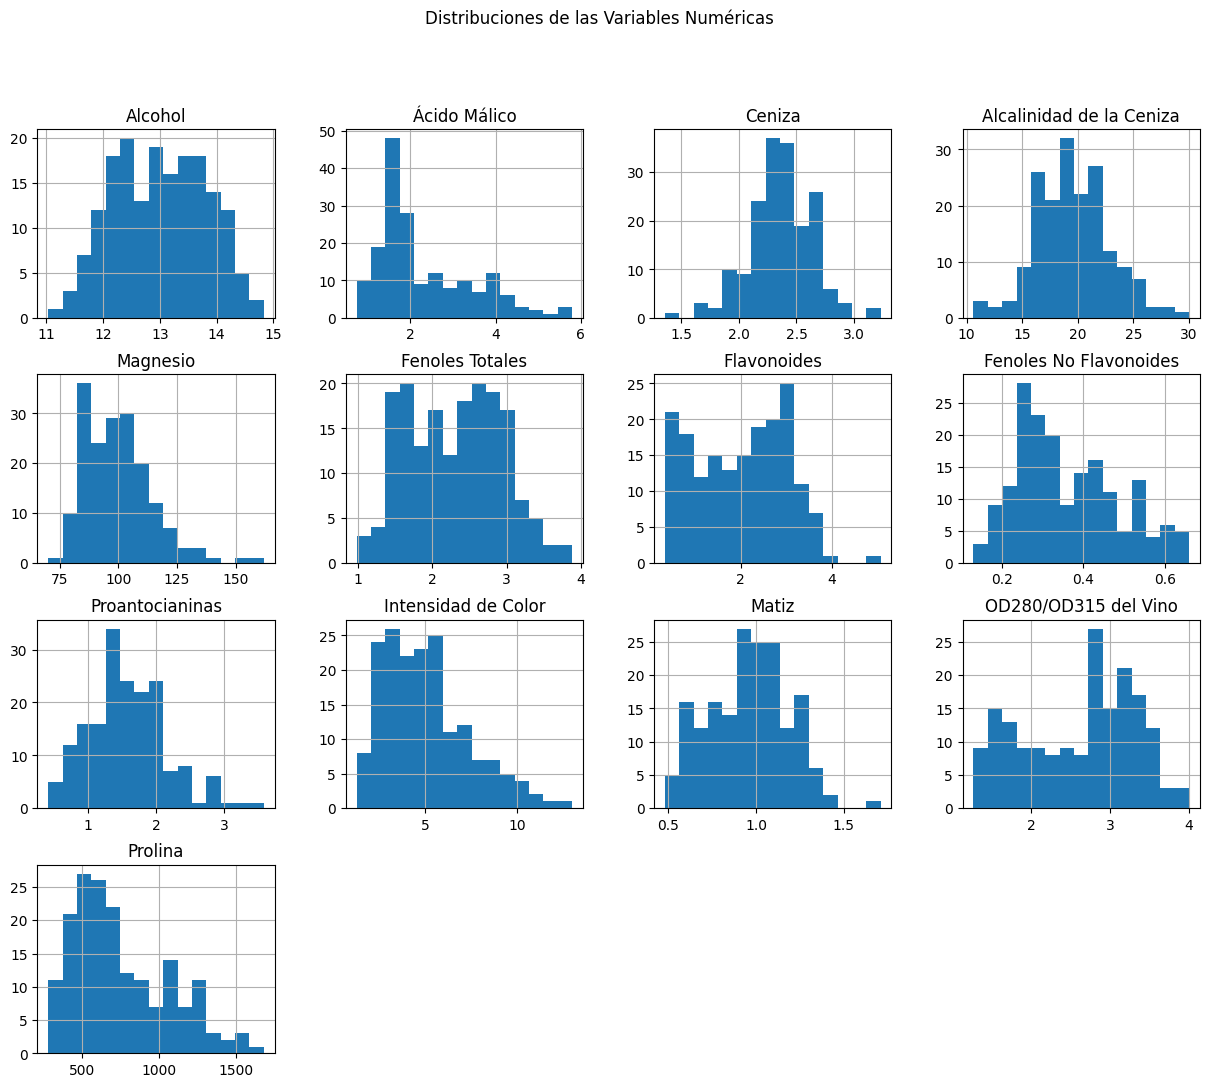

In [ ]:
df.drop('Clase', axis=1).hist(figsize=(15, 12), bins=15)
plt.suptitle("Distribuciones de las Variables Numéricas")
plt.show()

Con este bloque de código, lo que hago es lo siguiente:

Primero, elimino la columna 'Clase' del DataFrame df utilizando el método drop(). Como no me interesa esta columna para el análisis de distribuciones numéricas, la dejo fuera. La opción axis=1 indica que quiero eliminar una columna, no una fila.

Luego, genero un histograma para cada una de las variables numéricas restantes del DataFrame. Para ello, uso el método hist(), que crea un histograma para cada columna numérica. La opción figsize=(15, 12) especifica el tamaño de la figura para que los gráficos sean lo suficientemente grandes y fáciles de leer. La opción bins=15 indica que cada histograma tendrá 15 intervalos (o "bins").

Finalmente, añado un título general a la figura utilizando plt.suptitle() y luego muestro los gráficos con plt.show(). Esto me permite ver cómo se distribuyen los datos de cada una de las variables numéricas en el conjunto de datos.

Se puede observar rapidamente que se encuentran valores extremos pero no en mucha cantidad. En Ceniza podemos observar que es el que mas valores atipicos tiene.
Ahora analizaremos con el Z-Score que es una forma de medir cuántos desvíos estándar está un valor respecto a la media. Un Z-score muy alto suele considerarse outlier

In [ ]:
from scipy import stats

x = df.drop('Clase', axis=1)
z_scores = stats.zscore(x)

In [ ]:
# detectar outliers (3+ sigmas, 99% de los datos)
outliers = np.abs(z_scores) > 3

# contar filas con 1+ outliers
outliers_per_row = outliers.any(axis=1).sum()

print('Filas con 1+ outliers: ', outliers_per_row)
print('Total de outliers:     ', outliers.sum().sum())
print('Detalle por feature:', outliers.sum(axis=0))

Filas con 1+ outliers:  10
Total de outliers:      11
Detalle por feature: [0 1 3 1 2 0 1 0 1 1 1 0 0]


Como vimos en el grafico anteriormente, podemos ver de nuevo que tengo en total 11 outliers, solo 2 con mas de 1 que son:
* Ceniza tiene 3 outliers

* Magnesium tiene 2

El resto solo 1, entonces los valores estan dispersos y puede que sea un ruido normal, no errores.
Tambien puedo decir que 10 filas con al menos un outlier de un total de 178 -> poco más del 5% -> no parece excesivo.

Tomare la decisión de no eliminarlos por el momento

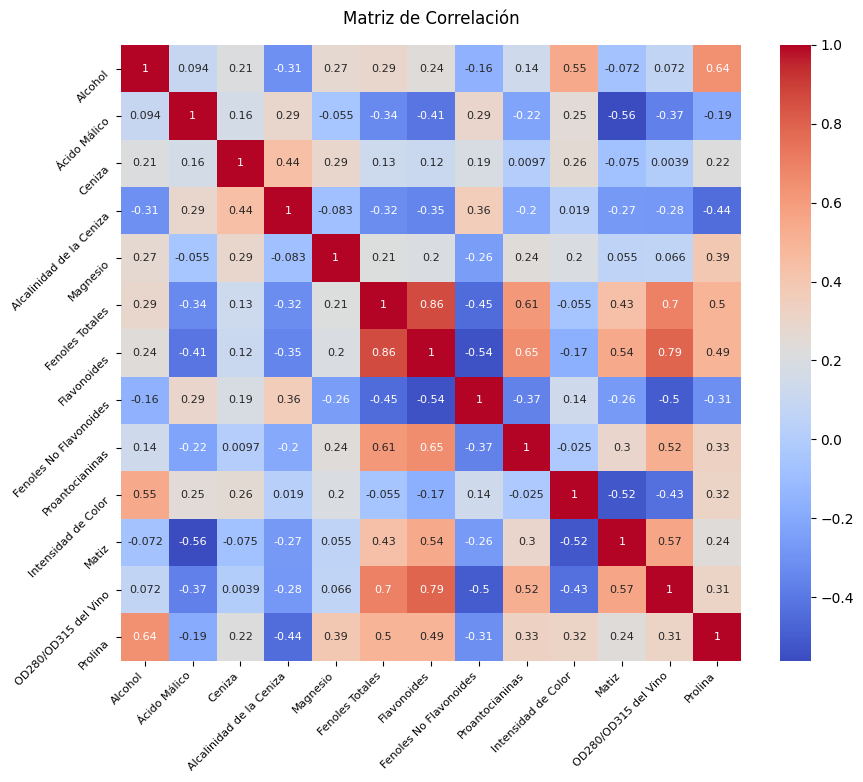

In [ ]:
correlation = x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Matriz de Correlación', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=8)   # rotar los label a 45 grados y alinear su texto
plt.yticks(rotation=45, va='top', fontsize=8)     # rotar los label a 45 grados y alinear su texto
plt.show()

**DESCRIPCIÓN SENCILLA DE LAS FEATURES PRINCIPALES:**
* Alcohol:
  
  → Representa el porcentaje de alcohol en el vino.
  
  → Afecta al cuerpo, sabor y fuerza del vino.

* Ácido Málico:
  
  → Es un ácido natural presente en las uvas.
  
  → Aporta acidez, pero disminuye a medida que la uva madura.

* Flavonoides:

  → Son compuestos que influyen en el sabor, el color y los beneficios para la salud del vino.

  → Más flavonoides suelen estar relacionados con vinos más intensos o de mayor calidad.

* Prolina:

  → Es un aminoácido que aparece en mayor cantidad en vinos más maduros.

  → Puede estar asociado con la calidad del vino.

* OD280/OD315 del Vino:

  → Es una medida técnica que evalúa la cantidad de ciertos compuestos fenólicos.

  → Estos compuestos están relacionados con el color y sabor del vino.

* Clase:

  → Es la categoría o tipo de vino al que pertenece (por ejemplo, tipo 1, 2 o 3).

*Esta informacion la busqué en internet y ChatGpt para tener mayor conocimiento del tema y analizar con un poco mas de contexto*

**Correlaciones Positivas Fuertes (mayores a 0.7)**

Estas variables aumentan juntas:

* Fenoles Totales y Flavonoides: 0.86

  * Muy lógico, ya que los flavonoides son un tipo de fenol.

* OD280/OD315 del Vino y Flavonoides: 0.79

  * Es probable que esta medición esté captando la presencia de flavonoides.

* Prolina y OD280/OD315 del Vino: 0.64

  * Tal vez ambas características estén relacionadas con la madurez de la uva o calidad del vino.

* Prolina y Fenoles Totales: 0.70

* Magnesio y Fenoles Totales: 0.64

**Correlaciones Negativas Fuertes (menores a -0.5)**

Estas variables aumentan en direcciones opuestas:

* Ácido Málico y Flavonoides: -0.56

  * Puede indicar un balance químico: cuando hay más flavonoides, menos ácido málico.

* Ácido Málico y OD280/OD315 del Vino: -0.56

* Intensidad de Color y Flavonoides: -0.52

  * Puede ser que ciertos tipos de flavonoides no están relacionados con el color.

**Correlaciones Medias (0.4 a 0.6)**
* Alcohol y Prolina: 0.64

* Alcohol y Intensidad de Color: 0.55

  * Parece que hay una ligera relación entre alcohol y color, interesante desde el punto de vista enológico.

* Fenoles No Flavonoides y Fenoles Totales: 0.61

**Variables poco correlacionadas (casi 0)**

Ceniza, Matiz y Ácido Málico están muy cerca de 0 con muchas variables.

Esto no significa que no sean útiles, pero pueden no estar linealmente relacionadas con las otras.

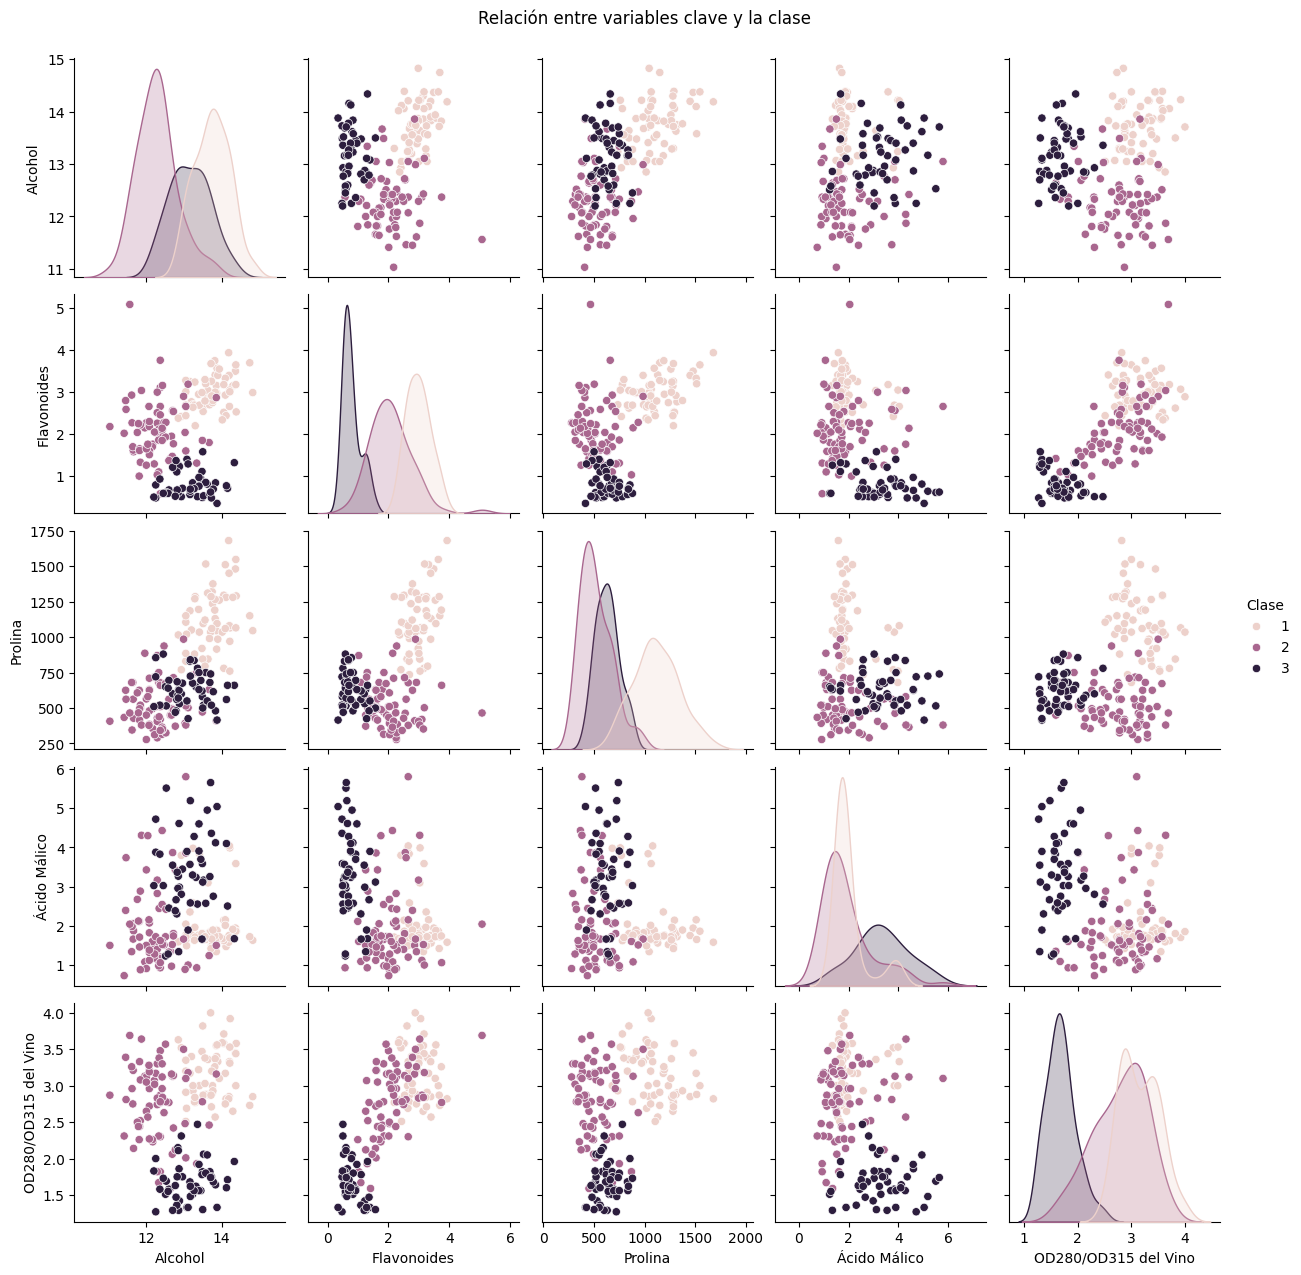

In [ ]:
# Gráfico de pares con nombres de columnas
sns.pairplot(df[['Alcohol','Flavonoides', 'Prolina', 'Ácido Málico', 'OD280/OD315 del Vino', 'Clase']], hue='Clase')
plt.suptitle("Relación entre variables clave y la clase", y=1.02)
plt.show()

Como podemos observar se sigue reflejando la correlacion que analicé anteriormente, las correlaciones positivas, negativas y la casi nula. En general se puede ver que la distribucion entre clases es bastante clara

En este bloque de código, lo que hago es generar una matriz de gráficos de dispersión (scatter plots) entre algunas variables del DataFrame, con la ayuda de seaborn y su función pairplot().

Primero, selecciono un subconjunto de las columnas del DataFrame df que quiero analizar. Esas son las variables que se van a comparar entre sí en los gráficos.

Luego, utilizo la función sns.pairplot() para crear los gráficos de dispersión entre todas las combinaciones posibles de estas columnas seleccionadas. Además, paso el argumento hue='Clase' para que cada punto de los gráficos se coloree de acuerdo con la columna 'Clase', que es la variable objetivo (en este caso, la clase de vino). Esto me permite ver cómo se agrupan las diferentes clases de vino según estas características.

Finalmente, añado un título general con plt.suptitle("Relación entre algunas variables clave y la clase") y muestro la matriz de gráficos con plt.show().

El resultado es una visualización que me ayuda a entender cómo se relacionan las variables seleccionadas entre sí y cómo estas relaciones difieren entre las distintas clases de vino.

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Otros pasos que crea conveniente para pre-procesar el dataset (mencione y explique)


Detalla las caracteristicas del dataset como nro de variables, nro de filas o instancias, si el problema es clasificacion binaria o multiclase, y otras características que crea conveniente.

Realice la división de datos (entrenamiento / testeo / CV según corresponda)

## Resolución:

**CARACTERISTICAS GENERALES DEL DATASET**
* Descripción: Diferencia tipos de vino a partir de características químicas.

* Variables: 13 variables numéricas que describen componentes químicos del vino

* Instancias: 178

* Clases: 3 tipos de vino (multiclase)

* Valores nulos: No tiene

In [ ]:
# Revisamos si hay valores nulos en el dataset
df.isnull().sum()

,0
Clase,0
Alcohol,0
Ácido Málico,0
Ceniza,0
Alcalinidad de la Ceniza,0
Magnesio,0
Fenoles Totales,0
Flavonoides,0
Fenoles No Flavonoides,0
Proantocianinas,0


Con esta línea de código, lo que hago es revisar si hay valores nulos (es decir, datos faltantes) en el DataFrame df. Utilizo el método isnull() para identificar las celdas que contienen valores nulos, lo que me devuelve un DataFrame de valores booleanos (True para los valores nulos y False para los valores no nulos).

Luego, con .sum(), sumo los valores True (que representan los valores nulos) por cada columna. Esto me muestra cuántos valores nulos hay en cada columna del conjunto de datos.

De esta manera, puedo identificar rápidamente si existe algún problema con los datos faltantes y saber en qué columnas podría necesitar realizar algún tratamiento o limpieza de datos.

1. No se encuentran valores faltantes.
2. No voy a eliminar outliers por la justificacion que di anteriormente al momento de identificarlos.
3. Con el objetivo de simplificar el modelo (ya que no conozco en profundidad todas las variables químicas), decidí eliminar las siguientes columnas:

  * Fenoles Totales: Muy correlacionada con Flavonoides (r = 0.86), me quedo con Flavonoides para evitar redundancia.

  * OD280/OD315 del Vino: Alta correlación con Flavonoides y Prolina, por lo que ya estaría representada de forma indirecta.

  * Prolina: También muy relacionada con otras variables como Fenoles y OD280/OD315.

  * Ceniza: Baja correlación con casi todas las variables, no aporta mucho valor al modelo.

  * Matiz: Mismo caso que Ceniza, poca relación con las demás columnas.

  * Ácido Málico: Tiene algunas correlaciones negativas pero en general poco clara su utilidad en un modelo simple.

In [ ]:
# Lista de columnas a eliminar
columnas_eliminar = [
    'Fenoles Totales',
    'OD280/OD315 del Vino',
    'Prolina',
    'Ceniza',
    'Matiz',
    'Ácido Málico'
]

# Creo un nuevo DataFrame sin esas columnas
df_filtrado = df.drop(columns=columnas_eliminar)

# Verifico el nuevo DataFrame
print("Columnas restantes:", df_filtrado.columns.tolist())


Columnas restantes: ['Clase', 'Alcohol', 'Alcalinidad de la Ceniza', 'Magnesio', 'Flavonoides', 'Fenoles No Flavonoides', 'Proantocianinas', 'Intensidad de Color']




A continuación, aplico el escalado a las características con StandardScaler de sklearn. Este es un tipo de normalización que transforma los datos de manera que tengan media cero y desviación estándar uno. Esto es útil para asegurar que todas las características tengan la misma escala, evitando que algunas variables dominen a otras debido a su magnitud.

Utilizo scaler.fit_transform(X) para ajustar el escalador a los datos de X (es decir, calcula la media y desviación estándar) y luego transformar esos datos, escalándolos. El resultado es un nuevo conjunto de datos, X_scaled, que contiene las mismas características pero ahora en una escala estándar.


In [ ]:
# Separar features (X) y variable objetivo (y)
X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']

# Crear el escalador
scaler = StandardScaler()

# Ajusto solo con el conjunto de entrenamiento
scaler.fit(X)

# Transformo los datos
X_scaled = scaler.transform(X)

# Verifico que la media sea 0 y la desviación 1 (como debe ser tras escalar)
print("Media de X_scaled:", np.mean(X_scaled, axis=0))
print("Desvío estándar de X_scaled:", np.std(X_scaled, axis=0))


Media de X_scaled: [-8.38280756e-16 -3.99181312e-17 -3.99181312e-17 -3.99181312e-16
  3.59263181e-16 -1.19754394e-16  2.49488320e-17]
Desvío estándar de X_scaled: [1. 1. 1. 1. 1. 1. 1.]


Los valores de media están prácticamente en cero y el desvío estándar está justo en 1.

Esto confirma que la normalización se realizó correctamente y que el escalador está funcionando bien.

4. No hay variables categóricas entre las features, solo numéricas. Tengo "clase" que es el target pero tiene números y Logistic Regression lo puede manejar





## 4. **Clasificación con logistic regression**    🎯🧩

En este apartado entrenará un clasificador con la librería sklearn usando logistic regresion.
   

### 4.1 Entrenamiento y evaluación



```
# # Cargar datos: Separar features (X) y variable objetivo (y)-> ya lo realice en el preprocesamiento
X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']
```



In [ ]:
print("Clases originales en y:", np.unique(y, return_counts=True))

Clases originales en y: (array([1, 2, 3]), array([59, 71, 48]))


In [ ]:
# Filtrar clases 1 y 2 antes de dividir
binary_mask = (y == 1) | (y == 2)
X_binary = X[binary_mask]
y_binary = y[binary_mask]
y_binary = y_binary.astype(int)

# Verificar las clases disponibles
print("Clases disponibles en y_binary:", np.unique(y_binary, return_counts=True))

# Dividir los datos en conjunto de entrenamiento y prueba de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

# Crear y entrenar el clasificador
clf = LogisticRegression(max_iter=1000) #aumente el numero de iteracion
clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = clf.predict(X_test)

Clases disponibles en y_binary: (array([1, 2]), array([59, 71]))


Decidí hacerlo de esta manera porque la regresión logística trabaja con dos clases, y mi dataset tenía tres. Para que el modelo funcionara sin problemas, filtré las clases 1 y 2, dejando fuera la clase 3 y convirtiendo el problema en una clasificación binaria.
Además, dividí los datos asegurándome de que la proporción de clases se mantuviera equilibrada en entrenamiento y prueba. También aumenté el número de iteraciones (1000), para darle al modelo más oportunidades de mejorar sus predicciones.
Con este enfoque, adapté la regresión logística al dataset y mejoré la estabilidad del modelo.

### 4.2 Métricas de evaluación

Muestre el desempeño en el conjunto de datos de entrenamiento y testeo.
Mencione las métricas utilizadas. No se olvide de mostrar la matriz de confusión.
Explique los resultados obtenidos.

In [ ]:
# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[17  1]
 [ 5 16]]
Accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           1       0.77      0.94      0.85        18
           2       0.94      0.76      0.84        21

    accuracy                           0.85        39
   macro avg       0.86      0.85      0.85        39
weighted avg       0.86      0.85      0.85        39



Interpretación:

- **Matriz de Confusión**:
  - 16 Verdaderos Negativos
  - 17 Verdaderos Positivos
  - 5 Falso Positivo (predijo clase 2, pero era clase 1).
  - 1 Falsos Negativos (predijo clase 1, pero era clase 2).
  
- **Exactitud (Accuracy)**: El modelo acertó en el 84.6% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 77% fueron correctas en clase 1 y el 94% en clase 2
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 94% de los casos positivos en clase 1 y 76% en clase 2.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando 0.85 en clase 1 y 0.84 en clase 2

El modelo tuvo un buen rendimiento general, con un 84.6% de precisión en la clasificación. Sin embargo, cometió algunos errores, especialmente confundiendo algunos ejemplos de la clase 2 con la clase 1. La sensibilidad en clase 1 (94%) fue alta, lo que indica que identificó correctamente la mayoría de los casos positivos, mientras que en clase 2 fue menor (76%).
En resumen, el modelo funciona bien, pero podría mejorar la identificación de la clase 2 para reducir los falsos negativos.


## **5. Otro clasificador**

### 5.1 Elija otro modelo para entrenar un clasificador

Elija alguno de los modelos vistos: kNN, SVM o MLP para entrenar un clasificador usando los parámetros por defecto de sklearn.

Justifique su elección.

Elegí **K-Nearest Neighbors (KNN)** porque es un modelo fácil de entender que clasifica los datos según sus vecinos más cercanos. Como mi conjunto de datos tiene tres clases bien definidas, KNN funciona bien, ya que agrupa instancias similares. Aunque puede ser afectado por el ruido, elegir bien el valor de k y normalizar los datos ayuda a mejorar su rendimiento.


### 5.2 Entrenamiento del modelo.

Primero debo definir x e y que ya lo hice anteriormente:



```
# X = df_filtrado.drop(columns=['Clase'])
y = df_filtrado['Clase']
```





Para determinar el número ideal de clústers se debería utilizar Silhoutte Score pero en mi caso voy a utilizar K=3 ya que es el numero de clases que tengo en el dataset. Luego hare el analisis final cambiando los valores de K.



In [ ]:
# Divido el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creo el modelo KNN con k=3 -> Número de clases
knn = KNeighborsClassifier(n_neighbors=3)

# Entreno el modelo
knn.fit(X_train, y_train)

# Hago predicciones
y_pred = knn.predict(X_test)

### 5.3 Evaluación del desempeño

In [ ]:
# Evalúo el rendimiento del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           1       0.75      0.79      0.77        19
           2       0.74      0.81      0.77        21
           3       1.00      0.79      0.88        14

    accuracy                           0.80        54
   macro avg       0.83      0.79      0.81        54
weighted avg       0.81      0.80      0.80        54



Interpretación:
  
- **Exactitud (Accuracy)**: El modelo acertó en el 79.6% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 75% fueron correctas en clase, el 74% en clase 2 y 100% clase 3.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 79% de los casos positivos en clase 1, 81% en clase 2 y 79% en clase 3.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando 0.77 en clase 1, 0.77 en clase 2 y 0.88 en clase 3.

El modelo de KNN con k=3 tuvo una precisión del 79.6%, acertando en la mayoría de los casos.
- Clase 3 tuvo 100% de precisión, pero su recall fue 79%, lo que indica que identificó la mayoría de los casos correctamente.
- Clases 1 y 2 fueron más equilibradas, con precisión y recall entre 75% y 81%.
En general, el modelo funcionó bien, aunque podría mejorar la identificación de algunas muestras en clases 1 y 2.

## **6.  Tuneo de hiperparámetros**

En esta sección debe modificar probar cómo la modificación de un hiperparámetro del modelo elegido en punto 5) afecta en los resultados.

Justifique y realice el experimento en esta sección.

In [ ]:
# Probar diferentes valores de k
for k in [1, 5, 7, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\nResultados para k={k}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))


Resultados para k=1:
Accuracy: 0.7962962962962963
              precision    recall  f1-score   support

           1       0.83      0.79      0.81        19
           2       0.73      0.76      0.74        21
           3       0.86      0.86      0.86        14

    accuracy                           0.80        54
   macro avg       0.81      0.80      0.80        54
weighted avg       0.80      0.80      0.80        54


Resultados para k=5:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.78      0.86      0.82        21
           3       1.00      0.79      0.88        14

    accuracy                           0.83        54
   macro avg       0.86      0.83      0.84        54
weighted avg       0.85      0.83      0.84        54


Resultados para k=7:
Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           1       0.84      0

**Análisis de la modificación del hiperparámetro k**

Al cambiar k, observamos cómo afecta la precisión y el rendimiento de la clasificación:
- **Con k=1:**
  - La precisión es 79.6%, ligeramente más baja que con valores mayores de k.
- **Con k=5:**
  - La precisión mejora a 83.3%, mostrando un mejor equilibrio entre las clases.
  - La clase 3 mantiene alta precisión (1.00), pero con menor sensibilidad (0.79).
- **Con k=7 y k=10:**
  - La precisión se mantiene en 83.3%, lo que indica estabilidad.
  - La clase 3 mejora su f1-score con k=10 (0.89), lo que sugiere que elegir un k ligeramente mayor ayuda a la clasificación de esta clase.



AMPLIANDO LA INTERPRETACION k=5:
  
- **Exactitud (Accuracy)**: El modelo acertó en el 83% de los casos.
- **Precisión (Precision)**: De todas las predicciones positivas, el 80% fueron correctas en clase, el 78% en clase 2 y 100% clase 3.
- **Sensibilidad (Recall)**: El modelo identificó correctamente el 84% de los casos positivos en clase 1, 86% en clase 2 y 79% en clase 3.
- **F1-Score**: Una medida de balance entre precisión y sensibilidad, alcanzando 0.82 en clase 1, 0.82 en clase 2 y 0.88 en clase 3.

### **CONCLUSÍON DE KNN PARA DISTINTOS VALORES DE K**
Con KNN k=5, el modelo mejora su precisión y estabilidad, alcanzando una exactitud del 83% frente al 79.6% de k=3.
- Clase 1 y 2 muestran mejor precisión y recall con k=5, lo que indica que el modelo identifica mejor estas categorías.
- Clase 3 mantiene 100% de precisión, pero su recall sigue en 79%, lo que sugiere que no todos los casos fueron correctamente reconocidos.

Por lo tanto, si bien k=3 parecía una opción lógica al inicio, los resultados muestran que k=5 o k=7 son mejores elecciones, ya que ofrecen mayor estabilidad y precisión al clasificar los tres tipos de vino. Además, es posible que la división entre clases haya sido afectada por la eliminación de algunas features o la presencia de outliers, lo que podría haber influido en el rendimiento del modelo.


## **7. Conclusiones**

Fundamente, justifique con sus palabras.

Después de probar **Logistic Regression** y **KNN con k=5**, noté que ambos modelos funcionan bien, pero tienen diferencias minimas en cómo clasifican los vinos.

* Muy importante tener en cuenta que LR clasifica solo 2 clases ya que es binaria a diferencia de KNN que se tienen en cuenta todas las clases.
* Ambas tienen una exactitud (acurracy), predicción correcta, del 83%.
* En el caso de la precisión LG es mejor en la clase 1 (0.83 > 0.8).
* La sensibilidad (recall) en en KNN es levemente superior.
* Y por ultimo, F1-Score es similar en ambos. Por lo tanto, al ser relativamente alto indica un buen balance entre precisión y recall en LR y KNN.

Me he dado cuenta que KNN es mas sensible a valores atipicos (que los he dejado intactos) ya que clasifica los datos basandose en los vecinos mas cercanos. Pienso esto porque K=3 (un poco pequeño), que en la logica seria el numero de clusters ideal ya que es la cantidad de clases de vinos en el dataset, tiene una exactitud menor que k=5.

Si revisara nuevamente los outliers y los trabajara de manera correcta, KNN seria el clasificador mas adecuando en mi caso ya que tiene 3 clases bien marcadas.

Esta comparación me ayudó a entender que la elección de un modelo depende de lo que quiero priorizar en la clasificación.


# Referencias

* Clases de la materia
* Chat GPT
* Copilot (IA de mi computadora)
* UCI plataforma del Dataset